## Curso 2 Intermediate Python

Capítulo 2 DataFrames: é um python type. Adimite colunas com tipos de dados diferentes. O index é o mesmo para todas as linhas

Aproveitado do curso pandas foundation:
https://www.datacamp.com/courses/pandas-foundations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Criando DataFrame de dicionário

In [2]:
# dicionário (associative array/arranjo associativo) é estrutura de dados núcleo em python
data = {'spain': {'capital': 'madrid', 'population': 46.77},
        'france': {'capital': 'paris', 'population': 66.03},
        'germany': {'capital': 'berlin', 'population': 80.62},
        'norway': {'capital': 'oslo', 'population': 5.084},
        'italy': {'capital': 'rome', 'population': 59.83}}

df = pd.DataFrame(data)
print(df)


             spain france germany norway  italy
capital     madrid  paris  berlin   oslo   rome
population   46.77  66.03   80.62  5.084  59.83


In [3]:
# lista de listas para dicionário de listas:
weekdays =  ['Sun', 'Sun', 'Mon', 'Mon']
cities = ['Austin','Dallas','Austin','Dallas']
visitors = [139,237,326,456]
signups = [7,12,3,5]

list_labels = ['city','signups', 'visitors', 'weekday'] # rótulo das colunas
list_cols = [cities, signups, visitors, weekdays]  # lista das listas (variáveis)

zipped = list(zip(list_labels, list_cols))  # lista de tuples (colunas e nomes das colunas, não respectivamente)
print(zipped) # matriz, coluna 1 é list_labels, coluna 2 é list_cols
print()
data = dict(zipped) # cria dicionário da lista de tuples
print(data)
print()
df = pd.DataFrame(data)
print(df)

[('city', ['Austin', 'Dallas', 'Austin', 'Dallas']), ('signups', [7, 12, 3, 5]), ('visitors', [139, 237, 326, 456]), ('weekday', ['Sun', 'Sun', 'Mon', 'Mon'])]

{'city': ['Austin', 'Dallas', 'Austin', 'Dallas'], 'signups': [7, 12, 3, 5], 'visitors': [139, 237, 326, 456], 'weekday': ['Sun', 'Sun', 'Mon', 'Mon']}

     city  signups  visitors weekday
0  Austin        7       139     Sun
1  Dallas       12       237     Sun
2  Austin        3       326     Mon
3  Dallas        5       456     Mon


### Criando DataFrame de .csv

In [4]:
#importando de .csv
df2 = pd.read_csv('AAPL.csv') 
df2 = pd.read_csv('AAPL.csv', index_col = 'Date')
# index_col = 'Date' ou = 0 indica a coluna que será o indice, default: número, igual da lista

In [5]:
df2.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-04,175.690002,177.750000,173.970001,175.850006,173.578033,27436200
2019-03-05,175.940002,176.000000,174.539993,175.529999,173.262161,19737400
2019-03-06,174.669998,175.490005,173.940002,174.520004,172.265228,20810400
2019-03-07,173.869995,174.440002,172.020004,172.500000,170.271317,24796400
2019-03-08,170.320007,173.070007,169.500000,172.910004,170.676025,23999400


### Python Types e Métodos do DataFrame

In [6]:
print(type(df)) # tipo python do objeto é pandas Dataframe
print(df)

<class 'pandas.core.frame.DataFrame'>
     city  signups  visitors weekday
0  Austin        7       139     Sun
1  Dallas       12       237     Sun
2  Austin        3       326     Mon
3  Dallas        5       456     Mon


#### Separando colunas

In [7]:
# com tipo series:
print(type(df['city'])) # tipo python da coluna: pandas series
print(df['city']) # vem com o index de linha mas nao com o label de coluna

# series é como uma numpy array de uma dimensão com labels (numéricos ou strings)
# e um cabeçalho para o index (label do index)
# guarda também a informação:'Name: city, Length: 254, dtype: dos elementos

<class 'pandas.core.series.Series'>
0    Austin
1    Dallas
2    Austin
3    Dallas
Name: city, dtype: object


In [8]:
# pegar coluna com tipo dataframe:
print(type(df[['city']])) # colchetes duplos
print(df[['city']]) # vem com o index de linha e com o label de coluna

<class 'pandas.core.frame.DataFrame'>
     city
0  Austin
1  Dallas
2  Austin
3  Dallas


In [9]:
# pegar coluna com tipo numpy array:
type(df['city'].values) 
df['city'].values

array(['Austin', 'Dallas', 'Austin', 'Dallas'], dtype=object)

In [10]:
# índice:
print(type(df.index))
print(df.index) # retorna os valores de indice (o range se o índice é default)
df.index = ['A','B','C','D'] # edita o índice (a lista deve ter tamanho = #linhas do dataframe)
print(type(df.index))

<class 'pandas.core.indexes.range.RangeIndex'>
RangeIndex(start=0, stop=4, step=1)
<class 'pandas.core.indexes.base.Index'>


In [11]:
# nomes das colunas:
print(type(df.columns)) # tipo do .columns é um index
df.columns # retorna o nome/label/índice das colunas
df.columns =  ['cidade','inscrições','visitantes', 'dia'] # edita o índice (a lista deve ter tamanho = #colunas do dataframe)
print(df.columns)

<class 'pandas.core.indexes.base.Index'>
Index(['cidade', 'inscrições', 'visitantes', 'dia'], dtype='object')


##### Informações

In [12]:
# tamanho:
type(df.shape) # tuple de valores numéricos
df.shape # tamanho da matriz (não inclui index nem index dos nomes das colunas)
df.shape[0] # número de linhas, conta ao longo do eixo/axis 0 = vertical
df.shape[1] # número de colunas, conta ao longo do eixo/axis 1 = horizontal
# dúvida: tem dataframe de mais de duas dimensões?

4

In [13]:
df.info()
# classe e tipo do objeto = dataframe;
# numero de indices e min e max;
# numero de colunas;
# por coluna: 
#     nome ----- numero de valores nao nulos (não-nan) --- tipo de variável;
# tipos de variáveis (e quantas colunas tem esse tipo) do dataframe;
# uso de memória.

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, A to D
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   cidade      4 non-null      object
 1   inscrições  4 non-null      int64 
 2   visitantes  4 non-null      int64 
 3   dia         4 non-null      object
dtypes: int64(2), object(2)
memory usage: 160.0+ bytes


In [14]:
df2['Open'].value_counts() # conta os valores de uma SÉRIE pandas

198.679993    2
220.000000    2
208.460007    2
199.199997    2
201.410004    1
             ..
227.929993    1
187.710007    1
267.899994    1
186.270004    1
180.000000    1
Name: Open, Length: 250, dtype: int64

### Seleção

In [15]:
# slice
df[0:1] # selecionando colunas 1 e 2   (ta errado)

,cidade,inscrições,visitantes,dia
A,Austin,7,139,Sun


#### Importando  .csv para DataFrame (alguns parâmetros)

In [16]:
# trazer sem cabeçalho:
df = pd.read_csv('AAPL_semlabels.csv', header = None) # faça isso quando a primeira linha já é de registros (não tem labels)

#colocando labels nas colunas:
col_names = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
df = pd.read_csv('AAPL_semlabels.csv', header = None, names = col_names)

df.head()

,Open,High,Low,Close,Adj Close,Volume
2019-03-04,175.690002,177.750000,173.970001,175.850006,173.578033,27436200
2019-03-05,175.940002,176.000000,174.539993,175.529999,173.262161,19737400
2019-03-06,174.669998,175.490005,173.940002,174.520004,172.265228,20810400
2019-03-07,173.869995,174.440002,172.020004,172.500000,170.271317,24796400
2019-03-08,170.320007,173.070007,169.500000,172.910004,170.676025,23999400


importando já substituindo algum valor por nan:

In [17]:
df = pd.read_csv('AAPL.csv', na_values='0') # quando tiver 0 ele substitui por nan; não é o caso desse df mas é so um exemplo
# obs.: se houver espaço antes ou depois do valor coloque o espaço dentro das aspas ' 0'

# pra fazer isso somente para determinadas colunas:
df = pd.read_csv('AAPL.csv', na_values={'Open':['175.690002'],'High':['177.750000']}) # use um dicionário, mesmo que pra 1 col só
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-04,NaN,NaN,173.970001,175.850006,173.578033,27436200
1,2019-03-05,175.940002,176.000000,174.539993,175.529999,173.262161,19737400
2,2019-03-06,174.669998,175.490005,173.940002,174.520004,172.265228,20810400
3,2019-03-07,173.869995,174.440002,172.020004,172.500000,170.271317,24796400
4,2019-03-08,170.320007,173.070007,169.500000,172.910004,170.676025,23999400


indicando as colunas de data:

In [18]:
df2 = pd.read_csv('AAPL.csv', index_col='Date', parse_dates = True) 
# importa com a data como index   (index_col='Date')
# no formato datetime (parse_dates = True)
type(df.index) # observe o tipo de variavel do index

pandas.core.indexes.range.RangeIndex

In [19]:
df2 = pd.read_csv('AAPL.csv', parse_dates = [[0,1,2]]) # informa quais colunas tem datas 
# pra esse exemplo de cima tinhamos um dataframe em que as 3 primeiras colunas eram ano, mês, dia
# o dataframe terá apenas uma coluna de datas com nome 'coluna1_coluna2_coluna3' => nome das colunas separado por _

usando data como index:

In [20]:
df2.index = df['Date'] # atribuindo essa coluna como index
df2.index.name = 'date'  # renomeando o index
# df2.drop  # dropando a coluna Date que não é index
df2.info() # observe o tipo de index, agora é datetime

<class 'pandas.core.frame.DataFrame'>
Index: 254 entries, 2019-03-04 to 2020-03-04
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date_Open_High  254 non-null    object 
 1   Low             254 non-null    float64
 2   Close           254 non-null    float64
 3   Adj Close       254 non-null    float64
 4   Volume          254 non-null    int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 11.9+ KB


Escrevendo .csv do dataframe que temos:

In [21]:
out_csv = 'nome.csv'
df.to_csv(out_csv)

# parametro: sep='\t' define o separador do .csv entre as colunas, default é ',' testar depois, tenho a mínima ideia

# pra tabela de excel
out_xlsx = 'nome.xlsx'
df.to_excel(out_xlsx)


### Plotando dados

In [22]:
df2 = pd.read_csv('AAPL.csv', index_col = 'Date', parse_dates = True)
df2.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-04,175.690002,177.750000,173.970001,175.850006,173.578033,27436200
2019-03-05,175.940002,176.000000,174.539993,175.529999,173.262161,19737400
2019-03-06,174.669998,175.490005,173.940002,174.520004,172.265228,20810400
2019-03-07,173.869995,174.440002,172.020004,172.500000,170.271317,24796400
2019-03-08,170.320007,173.070007,169.500000,172.910004,170.676025,23999400


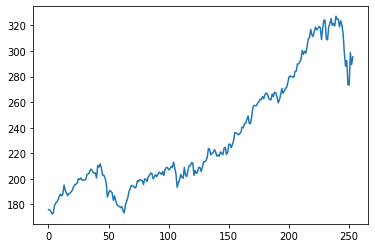

In [23]:
close_array = df2['Close'].values # array 

plt.plot(close_array)  # plotando numpy array ou lista; x é a posição da linha
plt.show()

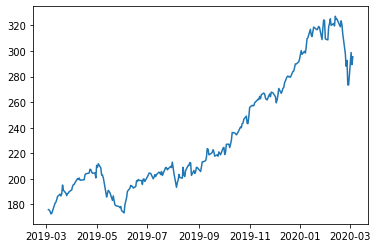

In [24]:
close_series = df2['Close'] # series 

plt.plot(close_series)  # plotando serie; index é o eixo x
plt.show()

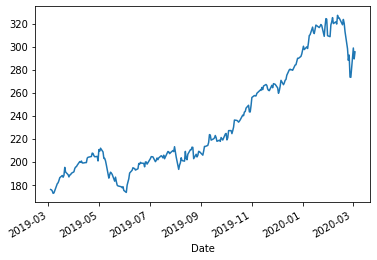

In [25]:
close_series.plot()  # usando plot do pandas

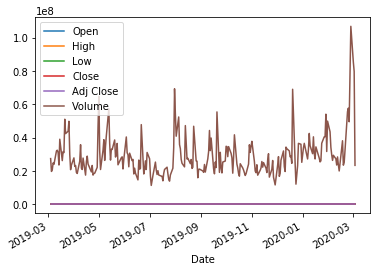

In [26]:
df2.plot() # plota todos os valores em relação ao index

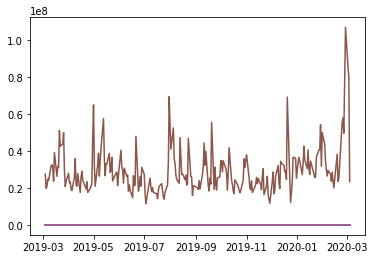

In [27]:
plt.plot(df2)

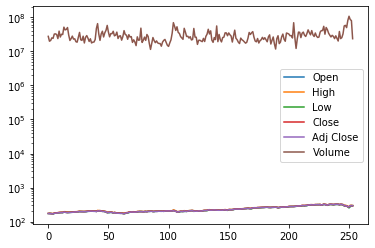

In [28]:
# mexendo na escala: printa o valor de y pela escala de base 10
df.plot()
plt.yscale('log')
plt.show()

### loc e iloc

df.loc['label'] retorna a linha ou coluna correspondente àquele rótulo (índice é palavra-chave)

df.iloc[5] retorna 

In [29]:
data = {'US': {'cars_per_cap': 809, 'country': 'United States', 'drives_right':True},
        'AUS': {'cars_per_cap': 731, 'country': 'Australia', 'drives_right':False},
        'JPN': {'cars_per_cap': 588, 'country': 'Japan', 'drives_right':False},
        'IN': {'cars_per_cap': 18, 'country': 'India', 'drives_right':False},
        'RU': {'cars_per_cap': 200, 'country': 'Russia', 'drives_right':True},
        'MOR':{'cars_per_cap': 70, 'country': 'Morocco', 'drives_right':True},
        'EG':{'cars_per_cap': 45, 'country': 'Egypt', 'drives_right':True}}

cars = pd.DataFrame(data)
cars=cars.T
print(cars)

    cars_per_cap        country drives_right
US           809  United States         True
AUS          731      Australia        False
JPN          588          Japan        False
IN            18          India        False
RU           200         Russia         True
MOR           70        Morocco         True
EG            45          Egypt         True


In [32]:
# Selecionando uma linha
print(cars.loc['JPN'])
print(cars.iloc[2])
print()
print(cars.iloc[2].shape) # sem orientação; 
type(cars.iloc[2]) # = Series
print(cars.iloc[[2]].shape) # duplo colchete: dataframe (vetor horizontal); 
type(cars.iloc[[2]]) # = DataFrame

# duas linhas:
cars.loc[['RU', 'AUS']]
cars.iloc[[4, 1]]

# Selecionando coluna
print(cars.loc[:, 'country']) # dtype = Series
print(cars.iloc[:, 1])
print(cars.iloc[:, 1].shape) # sem orientação; Series
# print(cars.iloc[[:, 'country']].shape) # duplo colchete: erro
print(cars.loc[:, ['drives_right']]) # colchete no label ou índice da coluna;  DataFrame

# duas colunas:
print(cars.loc[:, ['cars_per_cap', 'drives_right']]) # dtype = DataFrame

# Selecionando um elemento do corpo do df (especifica linha e coluna)
cars.loc['IN', 'cars_per_cap']
cars.iloc[3, 0]

# duas linhas, uma coluna
cars.loc[['IN', 'RU'], 'cars_per_cap']
cars.iloc[[3, 4], 0]

# Sub-dataframe (duas linhas, duas colunas)
cars.loc[['IN', 'RU'], ['cars_per_cap', 'country']] 
cars.iloc[[3, 4], [0, 1]] # [indice das linhas], [indice das colunas]

SyntaxError: invalid syntax (<ipython-input-32-f48f0a11dbd3>, line 12)